##Data Scraping is a technique to retrieve large amounts of data from the internet.
- This technique is highly useful in competitive pricing
-To check what our product’s optimal price should be we can compare the similar products that are already in the market.
-The most common technique for Data Scraping is using BeautifulSoup
#Beautiful soup 
-It extracts the html for the webpage and stores it as an unstructured data that needs to converted into structured format.



Web Scraping Project to analyze products from Flipkart. In this article we will cover, How to Scrape Data From Flipkart Website Using Python? How do you check if I can scrape a website? How can I scrape on Flipkart? Does flipkart allow web scraping?

#Import all the necessary libraries that we’ll require:


In [ ]:
import requests
import pandas as pd
import bs4

##Web Scraping Mobile phone data from Flipkart using Python
-Extracting product data from Flipkart using Pandas, BeautifulSoup4, Selenium & CSV.
-There are 2.5 quintillion bytes of data generated every day at our current pace, and the credit goes to the Internet of Things (IoT) devices.
-With access to this data, either in the form of audio, video, text, images, or any format, most businesses are relying heavily on data to beat their competitors & succeed in their business.
-Unfortunately, most of this data is not open.
-Most websites do not provide the option to save the data which they display on their websites. 
-his is where Web Scraping tools/ Software comes to extract the data from the websites.

##What is Web Scraping?
- Web Scraping is the process of automatically downloading the data displayed on the website using some computer program. 
- A web scraping tool can scrape multiple pages from a website & automate the tedious task of manually copying and pasting the data displayed.
- Web Scraping is important because, irrespective of the industry, the web contains information that can provide actionable insights for businesses to gain an advantage over competitors.


#What are the Steps Involved in Web Scraping?
- To Fetch the data using Web Scraping using Python, we need to go through the following steps:
- Find the URL that you want to scrape.
= Inspecting the Page.
- Find the data you want to extract.
- Write the code.
- Run the code & extract the data.
-Finally, Store the data in the required format.

#Packages used for Web Scraping
- Pandas: Pandas is a library used for data manipulation and analysis. It is used to store the data in the desired format.
- BeautifulSoup4: BeautifulSoup4 is the python web scraping library used for parsing HTML documents. It creates parse trees that are helpful in extracting tags from the HTML string.
- Selenium: Selenium is a tool designed to help you run automated tests in web applications. Although it’s not its main purpose, Selenium is also used in Python for web scraping, because it can access JavaScript-rendered content (which regular scraping tools like BeautifulSoup can’t do). We’ll use Selenium to download the HTML content from Flipkart and see in an interactive way what’s happening.
- CSV: The CSV module implements classes to read and write tabular data in CSV format.

Importing Libraries
Let’s start by installing the required packages.

#How to scrape data from flipkart

_ Importing ecessary librares like beautifullsoup4,request ,pandas ,csv etc
- Find url that you want to extract
- Inspect the page ,we need to specify the content variable from html which we want  to extract
- Writing code for scraping 
-Store the ressult in desired format

# Step1
Importing the necessary libraries 

In [ ]:
from bs4 import BeautifulSoup 
import requests 
import csv
import pandas as pd

#Requests is a Python HTTP library.So, basically with the help of this library we make a request to a web page.

# Step 2
- Find teh url that we want to extract 
- In this example we want to extract information from flipkart website and we will compare the price and ratings of different TV brands.
- Url of flipkart website containing Television information is 
https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off


To get the contents of the specified URL, submit a request using the requests library. 

Extract name,Rating and price 
Rightclick and click on inspect
Inspect the particular page -Click on icon and inpect for class ,price and rating of each product 
<!-- -->

In [ ]:
url = 'https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [ ]:
response = requests.get(url)

In [ ]:
response.status_code

200

In [ ]:
htmlcontent = response.content

In [ ]:
page = requests.get(url)

In [ ]:
soup = BeautifulSoup(htmlcontent,'html.parser')

- Here we use Beautifulsoup to parse the HTML content with the help of html parser.
- I did not get the soup printed here and got the prettify soup printed. It shows the html page in a better way.
- Check your output in form of html code.

- We want to extract product name and product price and product ratings.

##Step 3 Inspect the page, we need to specify the content variable from html which we want to  extract

-  right click on flipkart page and inspect elements and then select elements which you want to get.

- We will see a “Browser Inspector Box” open after clicking on inspect. We observe that the class name of the descriptions is ‘_4rR01T’ so we use the find method to extract the descriptions of the laptops.

In [ ]:
products=[]

prices=[]

ratings=[]

product=soup.find('div',attrs={'class':'_4rR01T'})

print(product.text)


Nokia 126 cm (50 inch) Ultra HD 4K QLED Smart Android TV with Sound by JBL and Powered by Harman Audio...





- Here we are getting particular aloevera gel description. For all aloe products descriptions we need to write a loop.

##Step 4 Writing code for scraping.

- Get all the classes corresponding to price and rating and for complete product.
- Class of entire one block having its description

In [ ]:
for a in soup.findAll('a',href=True, attrs={'class':'_1fQZEK'}):
  # entire selction of box class

  name=a.find('div',attrs={'class':'_4rR01T'})

  price=a.find('div',attrs={'class':'_30jeq3 _1_WHN1'})

  rating=a.find('div',attrs={'class':'_3LWZlK'})

  products.append(name.text)
  # find text append 

  prices.append(price.text)

  ratings.append(rating.text)

#3Step 5 Store the result in desired format.

In [ ]:
import pandas as pd

df = pd.DataFrame({'Product Name':products,'Prices':prices,'Ratings':ratings})

df.head()

,Product Name,Prices,Ratings
0,Nokia 126 cm (50 inch) Ultra HD 4K QLED Smart ...,"₹52,999",4
1,Candes 80 cm (32 inch) HD Ready LED Smart Andr...,"₹15,600",4.1
2,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,"₹14,999",4.4
3,realme 80 cm (32 inch) HD Ready LED Smart Andr...,"₹16,999",4.3
4,Mi 4A Horizon Edition 100 cm (40 inch) Full HD...,"₹21,999",4.3


- Cleaning up the data
Now, we’ll remove the symbols from Price and clean up the specification column.

In [ ]:
df['Prices'] = df['Prices'].str.lstrip('₹')
df['Prices'] = df['Prices'].replace({',':''}, regex=True)
df.head()

,Product Name,Prices,Ratings
0,Nokia 126 cm (50 inch) Ultra HD 4K QLED Smart ...,52999,4
1,Candes 80 cm (32 inch) HD Ready LED Smart Andr...,15600,4.1
2,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,14999,4.4
3,realme 80 cm (32 inch) HD Ready LED Smart Andr...,16999,4.3
4,Mi 4A Horizon Edition 100 cm (40 inch) Full HD...,21999,4.3


Some basic Analysis of the data we got
## Plotting a Boxplot

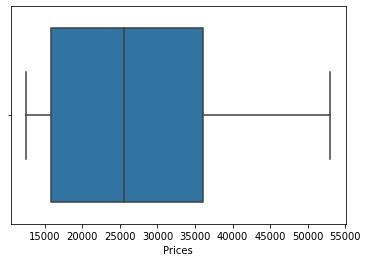

In [ ]:
import numpy as np
import seaborn as sns
df['Prices'] = df['Prices'].astype(np.float)
sns.boxplot(x=df['Prices'])

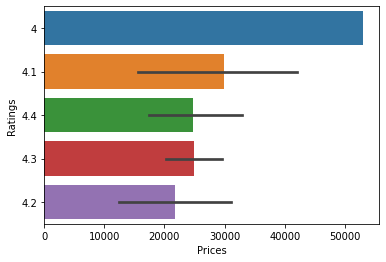

In [ ]:
sns.barplot(x=df['Prices'], y=df['Ratings'])

We can also observe that the prices has some effect on the ratings of the product.

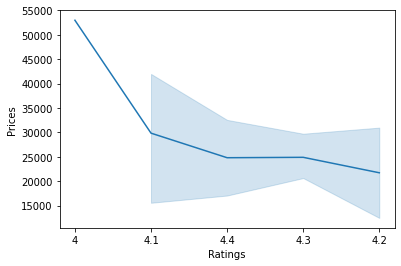

In [ ]:
sns.lineplot(x=df['Ratings'], y=df['Prices'])

- We can conclude that high priced TV shows rating of 4 while TV belonging to price range 25000-28000 shows the highest ratings(i.e. 4.4).
- Insights on how we can use data scraping for competitive pricing.

Store in a csv file-

In [33]:
df.to_csv('products.csv')

#A file name “products.csv” is created and this file contains the extracted data. 